In [2]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np


data = pd.read_csv("../data/csgo_task.csv")
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['bomb_planted'] = (~data['bomb_planted']).astype(np.byte)
data_new = pd.get_dummies(data, columns=['map'])
data_new

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,1,500.0,500.0,0.0,0.0,4000.0,4000.0,...,5.0,5.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,1,500.0,500.0,400.0,300.0,600.0,650.0,...,5.0,5.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,1,500.0,500.0,192.0,0.0,18350.0,10750.0,...,5.0,5.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,0,200.0,242.0,195.0,359.0,100.0,5950.0,...,2.0,4.0,0,0,0,0,0,0,1,0
122406,174.93,11.0,15.0,1,500.0,500.0,95.0,175.0,11500.0,23900.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122407,114.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122408,94.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0


In [4]:
data2 = pd.read_csv("../data/trip_duration_task_m.csv")

data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,-73.953918,40.778873,-73.963875,40.771164,400
1,-73.988312,40.731743,-73.994751,40.694931,1100
2,-73.997314,40.721458,-73.948029,40.774918,1635
3,-73.961670,40.759720,-73.956779,40.780628,1141
4,-74.017120,40.708469,-73.988182,40.740631,848


In [5]:
def testDataClassification(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [11]:
def testDataRegression(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print(mean_squared_error(y_test, bag.predict(X_test)))

In [6]:
X = data_new.drop(['bomb_planted'], axis=1)
y = data_new['bomb_planted']

In [9]:
testDataClassification(X,y)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2019
           1       0.99      0.99      0.99     14852

    accuracy                           0.98     16871
   macro avg       0.95      0.97      0.96     16871
weighted avg       0.98      0.98      0.98     16871



In [299]:
X.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
count,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000
mean,94.053707,6.779232,6.836820,407.871336,397.851153,319.696322,304.360235,10022.127926,11522.460012,2.135644,2.888531,1.661815,4.238915,4.229215
std,52.984146,4.802931,4.832594,134.024392,141.702350,169.121002,173.195358,11275.465347,12224.426788,1.829645,1.968444,1.614162,1.223794,1.248301
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.900000,3.000000,3.000000,332.000000,306.000000,196.000000,181.000000,1300.000000,1650.000000,0.000000,1.000000,0.000000,4.000000,4.000000
50%,94.870000,6.000000,6.000000,500.000000,499.000000,384.000000,356.000000,6000.000000,7750.000000,2.000000,3.000000,1.000000,5.000000,5.000000
75%,114.960000,10.000000,11.000000,500.000000,500.000000,487.000000,471.000000,15100.000000,18400.000000,4.000000,5.000000,3.000000,5.000000,5.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,5.000000,5.000000,6.000000


In [300]:
X.shape

(112471, 22)

In [301]:
vt = VarianceThreshold(20)
X_vt = vt.fit_transform(X)
X_vt.shape

(112471, 9)

In [302]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0


In [303]:
testDataClassification(X_vt,y)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2019
           1       0.99      0.99      0.99     14852

    accuracy                           0.98     16871
   macro avg       0.95      0.97      0.96     16871
weighted avg       0.98      0.98      0.98     16871



In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,1.527752,-1.411484,-1.414737,0.687405,0.720872,-1.890349,-1.757331,-0.534094,-0.615366,-1.16725,...,0.621909,0.617471,-0.03505,2.127061,-0.493765,-0.422255,-0.42513,-0.360616,-0.351421,-0.318982
1,1.169719,-1.411484,-1.414737,0.687405,0.720872,0.474832,-0.025175,-0.835635,-0.889408,-1.16725,...,0.621909,0.617471,-0.03505,2.127061,-0.493765,-0.422255,-0.42513,-0.360616,-0.351421,-0.318982
2,0.037300,-1.411484,-1.414737,-0.125883,0.015165,-0.151941,-0.602561,-0.822331,-0.901679,-1.16725,...,-0.195226,-0.183622,-0.03505,2.127061,-0.493765,-0.422255,-0.42513,-0.360616,-0.351421,-0.318982
3,-0.340173,-1.411484,-1.414737,-0.125883,0.015165,-0.151941,-0.602561,-0.822331,-0.901679,-1.16725,...,-0.195226,-0.183622,-0.03505,2.127061,-0.493765,-0.422255,-0.42513,-0.360616,-0.351421,-0.318982
4,1.527186,-1.203277,-1.414737,0.687405,0.720872,-0.755062,-1.757331,0.738587,-0.063190,-1.16725,...,0.621909,0.617471,-0.03505,2.127061,-0.493765,-0.422255,-0.42513,-0.360616,-0.351421,-0.318982


In [305]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
testDataClassification(X_vt, y)

(112471, 8)
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2019
           1       0.99      0.98      0.99     14852

    accuracy                           0.98     16871
   macro avg       0.94      0.96      0.95     16871
weighted avg       0.98      0.98      0.98     16871



In [306]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,time_left,ct_score,t_score,ct_health,ct_money,ct_helmets,map_de_inferno,map_de_train
0,1.527752,-1.411484,-1.414737,0.687405,-0.534094,-1.16725,-0.493765,-0.351421
1,1.169719,-1.411484,-1.414737,0.687405,-0.835635,-1.16725,-0.493765,-0.351421
2,0.037300,-1.411484,-1.414737,-0.125883,-0.822331,-1.16725,-0.493765,-0.351421
3,-0.340173,-1.411484,-1.414737,-0.125883,-0.822331,-1.16725,-0.493765,-0.351421
4,1.527186,-1.203277,-1.414737,0.687405,0.738587,-1.16725,-0.493765,-0.351421


In [307]:
skb = SelectKBest(k=3)
X_skb = skb.fit_transform(X_scaled, y)
testDataClassification(X_skb, y)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2019
           1       0.99      0.98      0.99     14852

    accuracy                           0.98     16871
   macro avg       0.94      0.95      0.94     16871
weighted avg       0.98      0.98      0.98     16871



In [308]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,time_left,ct_health,ct_players_alive
0,1.527752,0.687405,0.621909
1,1.169719,0.687405,0.621909
2,0.037300,-0.125883,-0.195226
3,-0.340173,-0.125883,-0.195226
4,1.527186,0.687405,0.621909
...,...,...,...
112466,-1.484294,-1.551003,-1.829495
112467,1.526431,0.687405,0.621909
112468,0.394012,0.687405,0.621909
112469,0.016539,0.687405,0.621909


In [309]:
tree = DecisionTreeClassifier().fit(X_scaled, y)
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_scaled, y)
X_rfe = pd.DataFrame(rfe.transform(X_scaled), columns=rfe.get_feature_names_out())
X_rfe

,time_left,ct_armor
0,1.527752,-1.890349
1,1.169719,0.474832
2,0.037300,-0.151941
3,-0.340173,-0.151941
4,1.527186,-0.755062
...,...,...
112466,-1.484294,-0.737323
112467,1.526431,-1.328619
112468,0.394012,1.036562
112469,0.016539,1.036562


In [310]:
testDataClassification(X_rfe, y)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2019
           1       0.99      0.99      0.99     14852

    accuracy                           0.98     16871
   macro avg       0.94      0.95      0.94     16871
weighted avg       0.98      0.98      0.98     16871



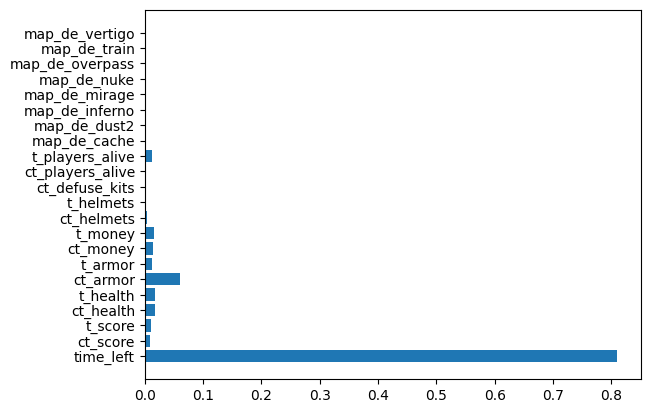

In [311]:
plt.barh(width=tree.feature_importances_, y=X.columns);

In [312]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled, y)
X_pca.shape

(112471, 2)

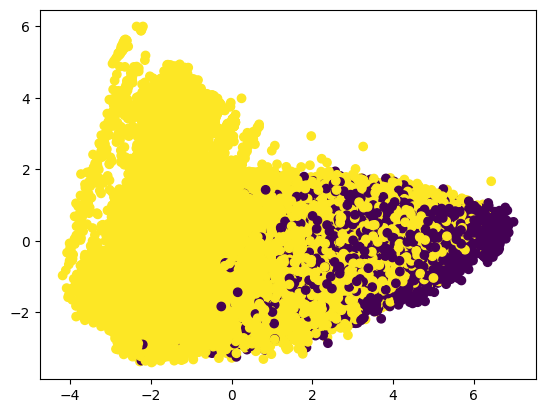

In [313]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [314]:
sum(pca.explained_variance_ratio_)

0.32420892518031924

In [315]:
testDataClassification(X_pca, y)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      2019
           1       0.93      0.94      0.93     14852

    accuracy                           0.88     16871
   macro avg       0.72      0.71      0.72     16871
weighted avg       0.88      0.88      0.88     16871



In [22]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

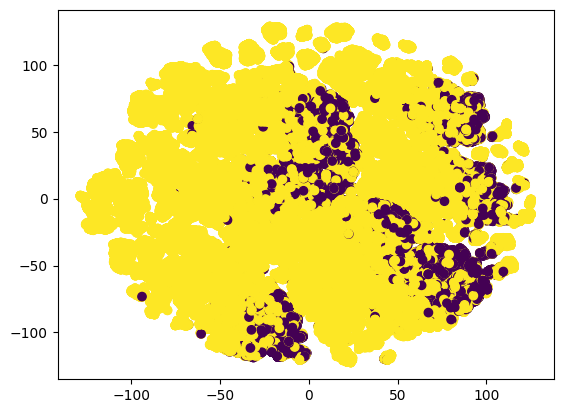

In [23]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

In [24]:
testDataClassification(X_tsne, y)

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2019
           1       0.94      0.95      0.95     14852

    accuracy                           0.90     16871
   macro avg       0.77      0.77      0.77     16871
weighted avg       0.90      0.90      0.90     16871



In [8]:
isomap = Isomap(n_components=6)
X_isomap = isomap.fit_transform(X_scaled[:20000])

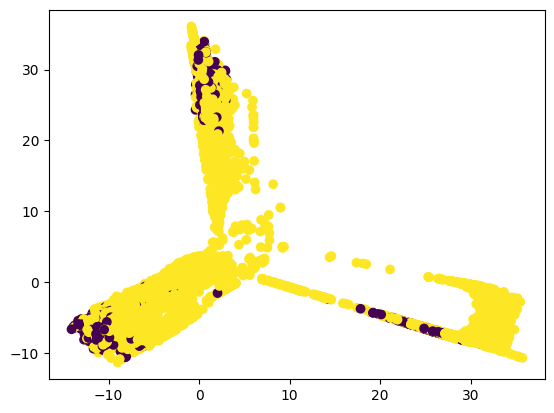

In [9]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:20000])

In [10]:
testDataClassification(X_isomap, y[:20000])

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       372
           1       0.93      0.94      0.93      2628

    accuracy                           0.88      3000
   macro avg       0.72      0.70      0.71      3000
weighted avg       0.87      0.88      0.88      3000



In [5]:
X = data2.drop(['trip_duration'], axis=1)
y = data2['trip_duration']

In [6]:
X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,199494.000000,199494.000000,199494.000000,199494.000000
mean,-73.973343,40.750954,-73.973407,40.751784
std,0.039282,0.028488,0.037392,0.032760
min,-74.398643,40.298828,-74.647537,40.293289
25%,-73.991837,40.737411,-73.991333,40.735817
50%,-73.981773,40.754093,-73.979805,40.754436
75%,-73.967377,40.768360,-73.963181,40.769764
max,-70.511902,42.458942,-70.511902,42.458942


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X_scaled.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.994940e+05,1.994940e+05,1.994940e+05,1.994940e+05
mean,6.867476e-14,8.908533e-14,6.419977e-14,-2.166259e-14
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.082692e+01,-1.587072e+01,-1.802894e+01,-1.399567e+01
25%,-4.708015e-01,-4.753691e-01,-4.794174e-01,-4.873898e-01
50%,-2.146226e-01,1.101984e-01,-1.711123e-01,8.097656e-02
75%,1.518744e-01,6.110039e-01,2.734919e-01,5.488511e-01
max,8.811815e+01,5.995458e+01,9.257447e+01,5.211147e+01


In [19]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
X_vt.shape

(199494, 1)

In [20]:
testDataRegression(X_vt,y)

10780974.848518915


In [22]:
skb = SelectKBest(k=3)
X_skb = skb.fit_transform(X_scaled, y)
testDataRegression(X_skb, y)

10998922.757016374


In [23]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_scaled, y)
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_scaled, y)
X_rfe = pd.DataFrame(rfe.transform(X_scaled), columns=rfe.get_feature_names_out())
X_rfe

,dropoff_longitude,dropoff_latitude
0,0.254924,0.591586
1,-0.570828,-1.735443
2,0.678716,0.706168
3,0.444682,0.880486
4,-0.395149,-0.340437
...,...,...
199489,0.240437,0.386644
199490,-0.673868,-1.792734
199491,0.052312,0.275206
199492,-0.405555,-0.928366


In [24]:
testDataRegression(X_rfe,y)

12899326.2858892


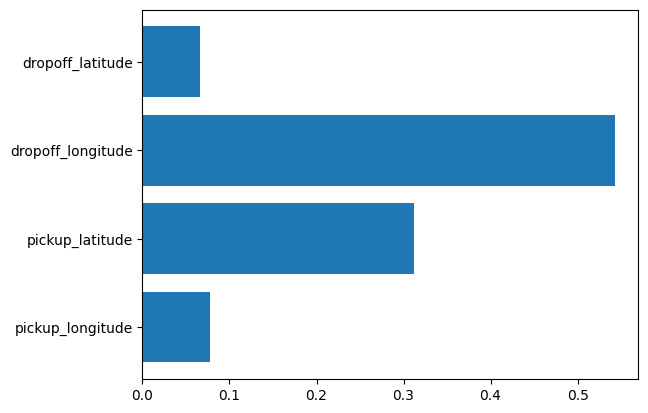

In [25]:
plt.barh(width=tree.feature_importances_, y=X.columns);

In [30]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled, y)
X_pca.shape

(199494, 3)

In [31]:
testDataRegression(X_pca,y)

31206854.54263048


In [32]:
sum(pca.explained_variance_ratio_)

0.8693387888315525

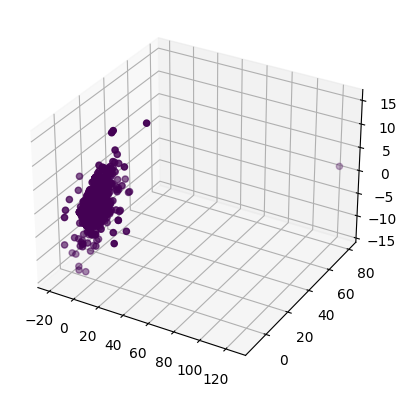

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y)

In [34]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

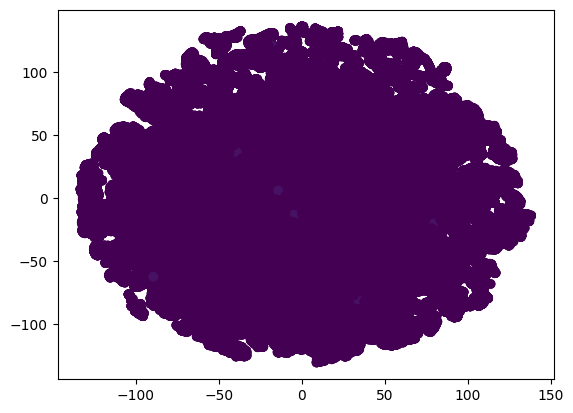

In [35]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

In [36]:
testDataRegression(X_tsne,y)

12465999.735204715


In [7]:
isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X_scaled[:20000])

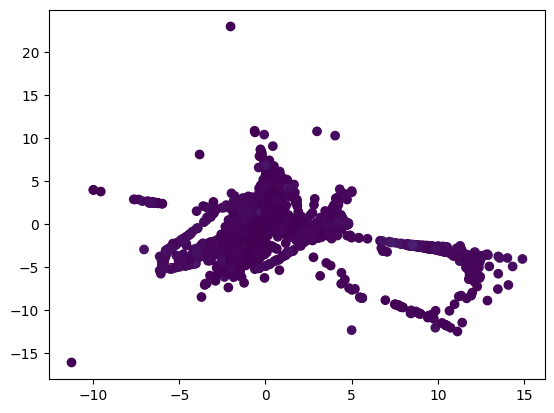

In [8]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:20000])

In [12]:
testDataRegression(X_isomap,y[:20000])

7077647.623373333
